<a href="https://colab.research.google.com/github/bhanupratap123/Basics/blob/master/Credit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
upload = files.upload()

Saving Demographic data.csv to Demographic data (1).csv


In [6]:
from google.colab import files
uploaded = files.upload()

Saving Credit Bureau data.csv to Credit Bureau data (1).csv


In [0]:
import io 
df1 = pd.read_csv(io.BytesIO(upload['Demographic data.csv']))

In [0]:
df2 = pd.read_csv(io.BytesIO(uploaded['Credit Bureau data.csv']))

In [0]:
#Libraries for 
import pandas as pd   #for DataFrame and Manipulation
import numpy as np      #for Linear Algebra

#for Visualisation
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats

#for Imbalanced dataset SMOTE
from imblearn.over_sampling import SMOTE

#for Accuracy Valiadation

#for splitting the data into trainning and test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#for model accuracy check
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

#for Shuffling the Data
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV

import itertools

from sklearn.metrics import roc_curve
from sklearn.metrics import auc



##Data Understanding:
In this task, you examine the data more closely. For each variable, you look at the range of values and their distributions. You’ll use simple data manipulation and basic statistical techniques for further checks into the data. Data exploration supports several purposes:

Get familiar with the data.

Spot signs of data quality problems.

Set the stage for data preparation steps.


In [9]:
print("There is {} rows and {} columns".format(df2.shape[0],df2.shape[1]))
print('=========================================')
print("There is {} rows and {} columns".format(df2.shape[0],df2.shape[1]))


There is 71295 rows and 19 columns
There is 71295 rows and 19 columns


In [10]:
print(df1.columns)
print('=====================')
print(df2.columns)

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag'],
      dtype='object')
Index(['Application ID', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiri

In [11]:
#Check the missing Values in the Performance Tag in both the Data set
print("Missing Values in Demographic Data")
print(df1['Performance Tag'].isnull().sum())

print('=================')

print("Missing Values in Credit Bureau Data")
print(df2['Performance Tag'].isnull().sum())


Missing Values in Demographic Data
1425
Missing Values in Credit Bureau Data
1425


###It seems that both the data set can be merged and they both having the equal number of missing value in Performace Tag.



In [0]:
Data = pd.merge(df1,df2,on ='Application ID' )

In [13]:
Data.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag_x', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto lo

In [0]:
#it seems to have two performance Tag columns,delete one
Data = Data.drop(['Performance Tag_x'],axis = 1)

In [15]:
Data.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presen

Missing Value:
Check the  missing values in the all columns

In [0]:
#find the missing values
Data.columns[Data.isnull().any()]

In [16]:
#missing value counts in each of these columns
miss_data = Data.isnull().sum()/len(Data)
miss_data = miss_data[miss_data > 0]
miss_data.sort_values(inplace=True)
miss_data


No of trades opened in last 6 months           0.000014
Gender                                         0.000028
No of dependents                               0.000042
Marital Status (at the time of application)    0.000084
Type of residence                              0.000112
Profession                                     0.000196
Education                                      0.001669
Presence of open home loan                     0.003815
Outstanding Balance                            0.003815
Avgas CC Utilization in last 12 months         0.014839
Performance Tag_y                              0.019986
dtype: float64

AttributeError: ignored

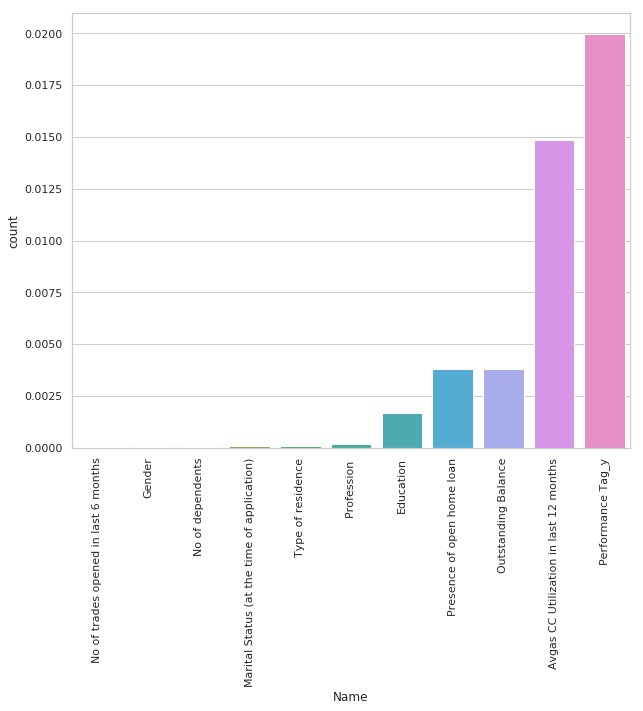

In [17]:
#visualising missing values
miss_data = miss_data.to_frame()
miss_data.columns = ['count']
miss_data.index.names = ['Name']
miss_data['Name'] = miss_data.index

#plot the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss_data)
plt.xticks(rotation = 90)
sns.show()

In [18]:

print(Data['Performance Tag_y'].unique())
print('==============')
print(Data['Performance Tag_y'].value_counts())


[ 0.  1. nan]
0.0    66927
1.0     2949
Name: Performance Tag_y, dtype: int64


In [0]:
#Extracting All Null value in Performance Tag to anaother df
Evaluation_Data=Data[Data['Performance Tag_y'].isnull() == True]
#All Not null values for Training 
Training_Data=Data[Data['Performance Tag_y'].isnull() == False]


In [20]:
print(Data.shape)
print("==============")
print(Evaluation_Data.shape)
print('===============')
print(Training_Data.shape)

(71301, 29)
(1425, 29)
(69876, 29)


In [21]:
Training_Data.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


###Data Preprocessing:

1 - Dummy Variable for Categorical data
2- Feature Scaling 

In [0]:
Training_Data = pd.get_dummies(Training_Data,columns = ['Gender','Marital Status (at the time of application)', 'Education','Profession ','Type of residence',
                                       'Presence of open home loan','Presence of open auto loan'],drop_first = True)

In [0]:
Training_Data['No of dependents'] =  StandardScaler().fit_transform(Training_Data['No of dependents'].values.reshape(-1, 1))
Training_Data['months in current residence'] =  StandardScaler().fit_transform(Training_Data[ 'No of months in current residence'].values.reshape(-1, 1))
Training_Data['months in current co'] =StandardScaler().fit_transform(Training_Data['No of months in current company'].values.reshape(-1, 1))
Training_Data['No of times 90 DPD or worse in last 6 months'] =  StandardScaler().fit_transform(Training_Data[ 'No of times 90 DPD or worse in last 6 months'].values.reshape(-1, 1))
Training_Data['No of times 60 DPD or worse in last 6 months'] =  StandardScaler().fit_transform(Training_Data[ 'No of times 60 DPD or worse in last 6 months'].values.reshape(-1, 1))
Training_Data['No of times 30 DPD or worse in last 6 months'] =  StandardScaler().fit_transform(Training_Data[ 'No of times 30 DPD or worse in last 6 months'].values.reshape(-1, 1))
Training_Data['No of times 90 DPD or worse in last 12 months'] =  StandardScaler().fit_transform(Training_Data['No of times 90 DPD or worse in last 12 months'].values.reshape(-1, 1))
Training_Data['No of times 60 DPD or worse in last 12 months'] =  StandardScaler().fit_transform(Training_Data['No of times 60 DPD or worse in last 12 months'].values.reshape(-1, 1))
Training_Data['No of times 30 DPD or worse in last 12 months'] =  StandardScaler().fit_transform(Training_Data['No of times 30 DPD or worse in last 12 months'].values.reshape(-1, 1))
Training_Data['Avgas CC Utilization in last 12 months'] =  StandardScaler().fit_transform(Training_Data['Avgas CC Utilization in last 12 months'].values.reshape(-1, 1))
Training_Data['No of trades opened in last 6 months'] =  StandardScaler().fit_transform(Training_Data['No of trades opened in last 6 months'].values.reshape(-1, 1))
Training_Data['No of trades opened in last 12 months'] =  StandardScaler().fit_transform(Training_Data['No of trades opened in last 12 months'].values.reshape(-1, 1))
Training_Data['No of PL trades opened in last 6 months'] =  StandardScaler().fit_transform(Training_Data['No of PL trades opened in last 6 months'].values.reshape(-1, 1))
Training_Data['No of Inquiries in last 6 months'] =  StandardScaler().fit_transform(Training_Data['No of Inquiries in last 6 months (excluding home & auto loans)'].values.reshape(-1, 1))
Training_Data['No of Inquiries in last 12 months'] =  StandardScaler().fit_transform(Training_Data['No of Inquiries in last 12 months (excluding home & auto loans)'].values.reshape(-1, 1))
Training_Data['Outstanding Balance'] =  StandardScaler().fit_transform(Training_Data['Outstanding Balance'].values.reshape(-1, 1))
Training_Data['Total No of Trades'] =  StandardScaler().fit_transform(Training_Data['Total No of Trades'].values.reshape(-1, 1))
Training_Data['Income'] =  StandardScaler().fit_transform(Training_Data['Income'].values.reshape(-1, 1))
Training_Data['Age'] =  StandardScaler().fit_transform(Training_Data['Age'].values.reshape(-1, 1))
Training_Data['No of months in current residence'] =  StandardScaler().fit_transform(Training_Data['No of months in current residence'].values.reshape(-1, 1))
Training_Data['No of months in current company'] =  StandardScaler().fit_transform(Training_Data['No of months in current company'].values.reshape(-1, 1))



In [0]:
Training_Data = Training_Data.drop(columns = ['Application ID'])

In [0]:
Train = np.array(Training_Data.loc[Training_Data.columns =='Performance Tag_y'])

In [26]:
Training_Data['Performance Tag_y'].shape

(69876,)

In [0]:
Training_Data.dropna(axis = 0 , how = 'any',inplace = True)

In [28]:
Training_Data.columns

Index(['Age', 'No of dependents', 'Income',
       'No of months in current residence', 'No of months in current company',
       'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Outstanding Balance', 'Total No of Trades', 'Performance Tag_y',
       'Gender_M', 'Marital Status (at the time of application)_Single',
      

In [0]:
#Training_Data
X = np.array(Training_Data.loc[:,Training_Data.columns != 'Performance Tag_y'])
y = np.array(Training_Data.loc[:,Training_Data.columns == 'Performance Tag_y'])

In [0]:
#Splitting The data into test and Trainning Set


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
print("Number of Transaction X_train",X_train.shape)
print("Number of Transaction y_train",y_train.shape)
print("Number of Transaction X_train",X_test.shape)
print("Number of Transaction y_test",y_test.shape)

Number of Transaction X_train (48195, 38)
Number of Transaction y_train (48195, 1)
Number of Transaction X_train (20655, 38)
Number of Transaction y_test (20655, 1)


In [0]:
#We will use SMOTE only in the 
sm = SMOTE(random_state = 2)
X_train_sm , y_train_sm = sm.fit_sample(X_train,y_train.ravel())

In [32]:
print('Before Oversampling, count of Label 1 : {}'.format(sum(y_train == 1)))
print('Before Oversampling, count of Label 0 : {}'.format(sum(y_train == 0)))
print('===================================================')
print("After Oversampling, count of Label 1 : {}".format(sum(y_train_sm == 1)))
print("After Oversaampling, count of Label 0 : {}".format(sum(y_train_sm == 0)))

Before Oversampling, count of Label 1 : [2020]
Before Oversampling, count of Label 0 : [46175]
After Oversampling, count of Label 1 : 46175
After Oversaampling, count of Label 0 : 46175


In [34]:
#lets implement the Classifier 

parameters = {
    'C' : np.linspace(1,10,10)
             }

lr = LogisticRegression()

#import Grid Search CV
clf = GridSearchCV(lr,parameters,cv = 5,verbose = 5,n_jobs = 3)
clf.fit(X_train_sm,y_train_sm.ravel())


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   21.7s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  1.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [35]:
clf.best_params_

{'C': 6.0}

In [36]:
lr1 = LogisticRegression(C = 6,penalty = 'l1',verbose = 5)
lr1.fit(X_train_sm,y_train_sm.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=5,
                   warm_start=False)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
y_train_pre = lr1.predict(X_train)


Recall metric in the train dataset: 65.39603960396039%
Confusion matrix, without normalization
[[27849 18326]
 [  699  1321]]


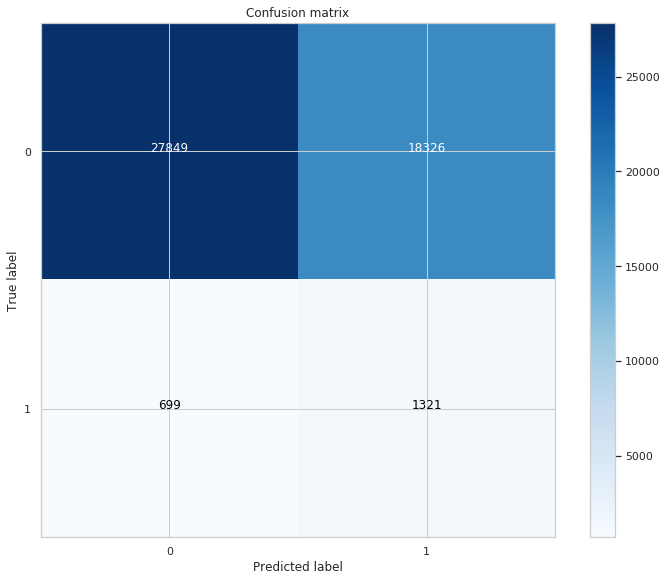

In [42]:
cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names,normalize = False, title='Confusion matrix',)
plt.show()

Recall metric in the testing dataset: 62.65607264472191%
Confusion matrix, without normalization
[[11908  7866]
 [  329   552]]


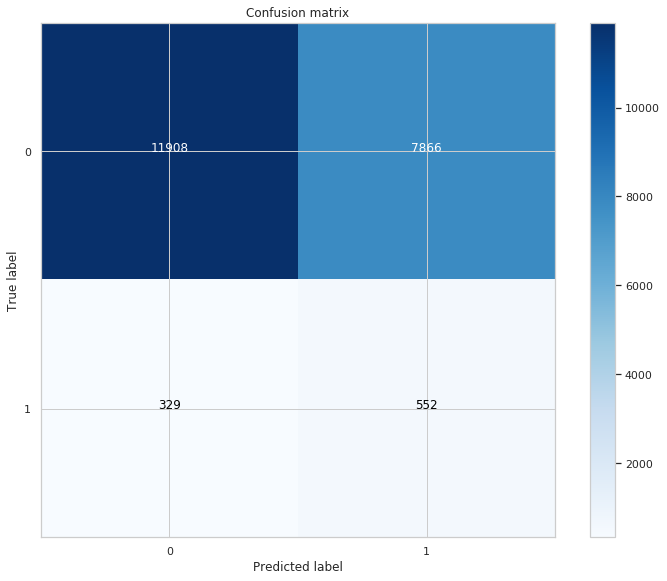

In [43]:
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()


In [44]:
tmp = lr1.fit(X_train_sm, y_train_sm.ravel())


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

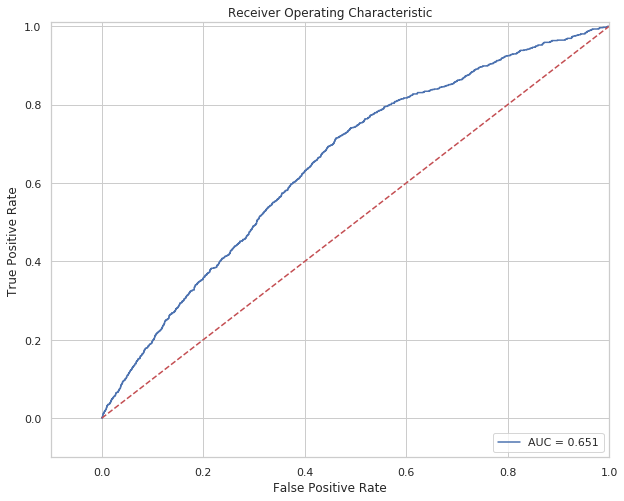

In [47]:
y_pred_sample_score = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [48]:
roc_auc


0.651058378519495